<center>
<h1>
Szeregi czasowe - Eigenfaces
</h1>
<h2>
Sprawozdanie z laboratorium
</h2>
</center>

<p style="text-align: right">
<b><i>Wykonali:</i></b><br>
    
<i>Paweł Suchanicz</i><br>
<i>Elżbieta Dziedzic</i>
</p>

In [19]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
import math

In [20]:
images_path = 'images/'
images_files = os.listdir(images_path)

In [21]:
# zamiana na rgb
def rgb_to_grayscale(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [22]:
# wyświetlenie obrazków
def display_images(images):
    for i in range(images.shape[0]):
        img = images[i].reshape(height,width)  
        plt.subplot(math.ceil(images_count / 5), 5, i+1)
        plt.imshow(img, cmap='gray')
        plt.subplots_adjust(right=1.2, top=1.2)
    plt.show()

Wczytanie obrazków i zamian na skalę szarości

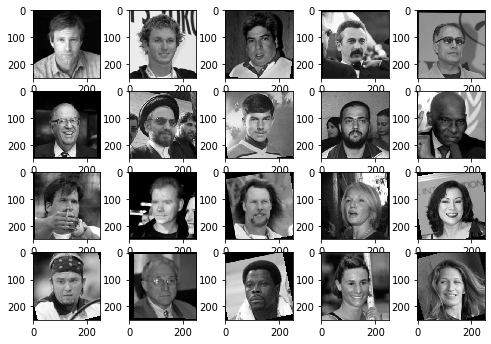

In [23]:
width  = 250
height = 250
images_count = len(images_files)
images = np.zeros((images_count, height*width))
for i in range(images_count):
    img = rgb_to_grayscale(imread(images_path + images_files[i]))
    images[i] = np.array(img.flatten('C'), dtype='float64').flatten()

display_images(images)

Wyliczenie średniego obrazu

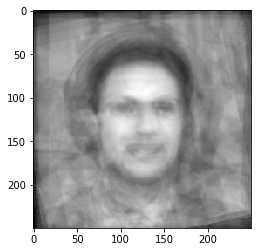

In [24]:
mean_face = np.zeros((1, height * width))

for image in images:
    mean_face = mean_face + image
    
mean_face = mean_face / images.shape[0]

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.show()

Znormalizowanie pozostałych obrazków (odjęcie średniego obrazu)

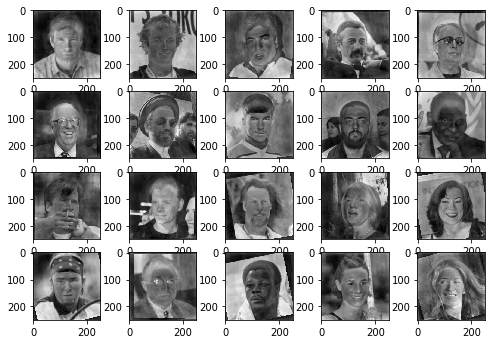

In [25]:
normalised_images = np.ndarray(shape=images.shape)

for i in range(normalised_images.shape[0]):
    normalised_images[i] = images[i] - mean_face
    
display_images(normalised_images)

In [26]:
covariance_matrix = np.cov(normalised_images.transpose())

MemoryError: 

Nie można obliczyć macierzy kowariancji z powodu zbyt dużej ilości danych (brak pamięci)